# Lasso

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("Advertising.csv")

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
x=df.drop("sales",axis=1)
y=df["sales"]

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_conv=PolynomialFeatures(degree=3,include_bias=False)
poly_feat=poly_conv.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(poly_feat,y,test_size=0.3,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.fit_transform(x_test)
    

In [18]:
from sklearn.linear_model import LassoCV
model=LassoCV(eps=0.01,n_alphas=100,cv=5)

In [19]:
model.fit(scaled_x_train,y_train)

LassoCV(cv=5, eps=0.01)

In [24]:
pred=model.predict(scaled_x_test)

In [25]:
model.coef_

array([ 2.29031273,  0.33397447,  0.        , -0.        ,  3.66932288,
        0.        ,  0.        ,  0.01455141,  0.        , -0.86001608,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.14179396,  0.        ,  0.        ,  0.        ])

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
np.sqrt(mean_squared_error(pred,y_test))

1.5007896076155325

# POLYNOMIAL

In [29]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [30]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [31]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
train_rmse=[]
test_rmse=[]

for i in range(2,10):
    poly_conv=PolynomialFeatures(degree=i,include_bias=False)
    poly_feat=poly_conv.fit_transform(x)
    
    x_train,x_test,y_train,y_test=train_test_split(poly_feat,y,test_size=0.3,random_state=0)
    
    model=LinearRegression()
    model.fit(x_train,y_train)
    
    pred_train=model.predict(x_train)
    pred_test=model.predict(x_test)
    
    rmse_train=np.sqrt(mean_squared_error(pred_train,y_train))
    rmse_test=np.sqrt(mean_squared_error(pred_test,y_test))
    
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

In [37]:
train_rmse

[0.4720030723661927,
 0.35449928404062875,
 0.26901943561273195,
 0.24218807474123652,
 0.19042060700964647,
 7.466955453367821,
 0.17376122521516368,
 0.24442470889467954]

In [38]:
test_rmse

[0.8802914106197599,
 0.7453999704617156,
 2.0423779789271532,
 1.207263701438557,
 7.408615232155942,
 3992.267510326676,
 80086.45312326933,
 691563.0840263095]

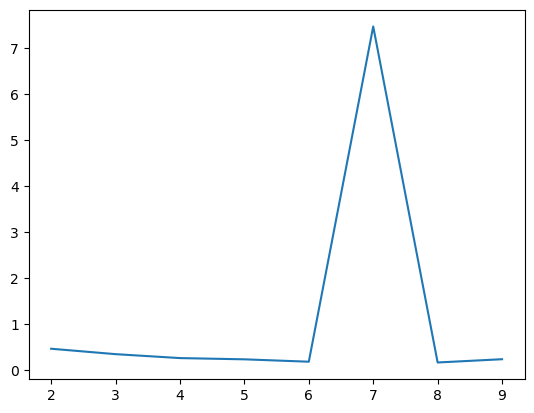

In [39]:
plt.plot(range(2,10),train_rmse)

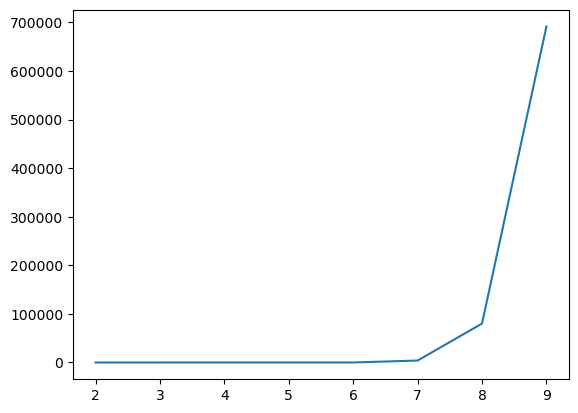

In [40]:
plt.plot(range(2,10),test_rmse)

# SVR

In [41]:
df=pd.read_csv("cement_slump.csv")

In [42]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


In [43]:
x=df.drop("Compressive Strength (28-day)(Mpa)",axis=1)
y=df["Compressive Strength (28-day)(Mpa)"]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.fit_transform(x_test)

In [46]:
from sklearn.svm import SVR
model=SVR()
model.fit(scaled_x_train,y_train)

SVR()

In [47]:
pred=model.predict(scaled_x_test)

In [48]:
from sklearn.metrics import mean_squared_error


In [49]:
rmse=np.sqrt(mean_squared_error(pred,y_test))

In [50]:
rmse

6.290550351233524

In [51]:
from sklearn.model_selection import GridSearchCV
svm=SVR()
param={"kernel":["linear","rbf","poly"],
      "C":[1.0,0.1,0.5],
      "epsilon":[0.1,0.5,1],
      "gamma":["auto","scaled"],
      "degree":[2,3,4,5]}
grid=GridSearchCV(svm,param)
grid.fit(scaled_x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 243, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'scaled' instead.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\Admin\anaconda3\lib\site

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.0, 0.1, 0.5], 'degree': [2, 3, 4, 5],
                         'epsilon': [0.1, 0.5, 1], 'gamma': ['auto', 'scaled'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
grid.best_params_

{'C': 1.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}

In [53]:
pred=grid.predict(scaled_x_test)

In [54]:
rmse=np.sqrt(mean_squared_error(pred,y_test))


In [55]:
rmse

3.1065210438316777

# k_means

In [60]:
df=pd.read_csv("cluster_blobs.csv")

In [61]:
df

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


<AxesSubplot:xlabel='X1', ylabel='X2'>

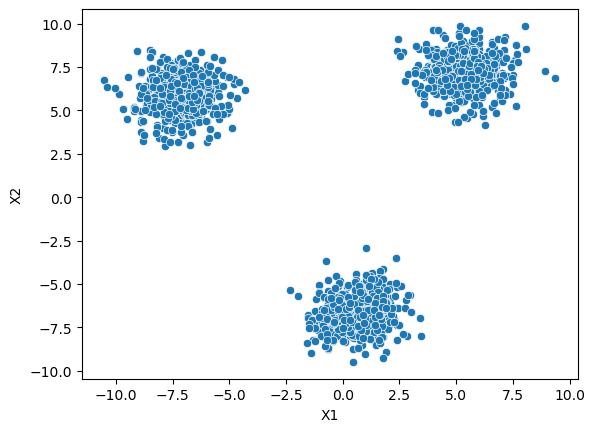

In [62]:
sns.scatterplot(data=df,x="X1",y="X2")

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [72]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
clustr=model.fit_predict(scaled_df)

In [73]:
clustr

array([1, 1, 0, ..., 1, 1, 0])

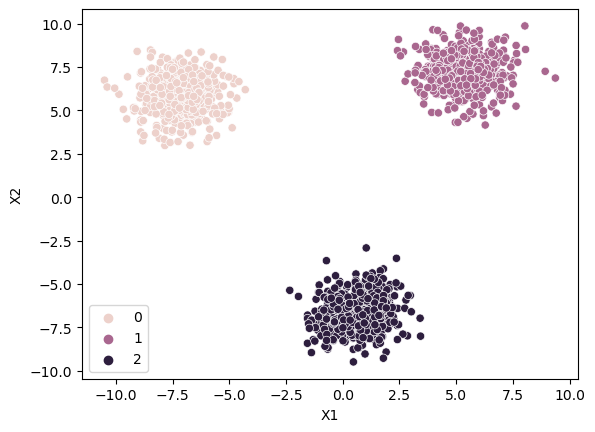

In [74]:
sns.scatterplot(data=df,x="X1",y="X2",hue=clustr);

In [75]:
ssd=[]
for k in range(1,10):
    model=KMeans(n_clusters=k)
    model.fit(scaled_df)
    
    ssd.append(np.sum(model.inertia_))

In [76]:
ssd

[3000.0,
 1496.9350591985892,
 93.99229761961197,
 81.5246716214348,
 70.43843946604315,
 59.03681797311052,
 53.20641657234292,
 47.958113834207786,
 41.7464007678808]

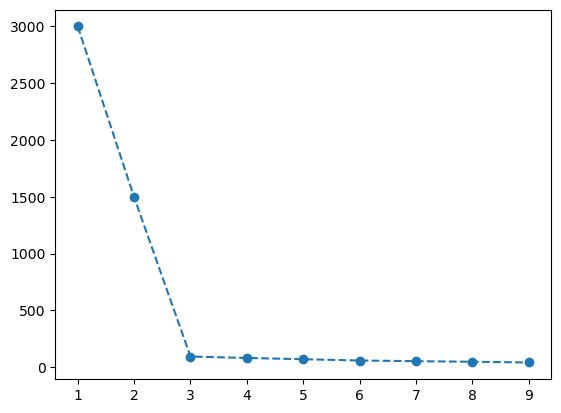

In [78]:
plt.plot(range(1,10),ssd,"o--")

In [79]:
df

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


# DBSCAN

In [80]:
df=pd.read_csv("cluster_moons.csv")

In [81]:
df

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


<AxesSubplot:xlabel='X1', ylabel='X2'>

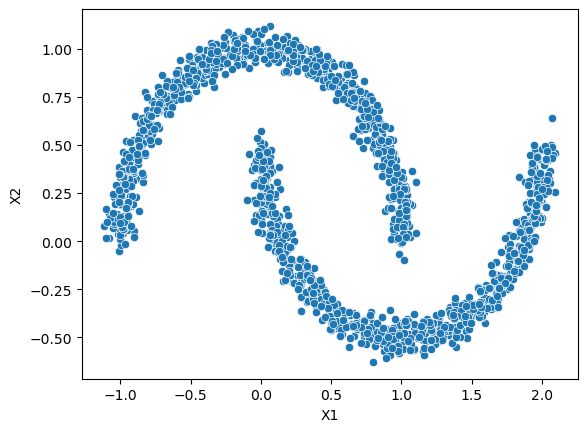

In [82]:
sns.scatterplot(data=df,x="X1",y="X2")

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [84]:
from sklearn.cluster import DBSCAN
model=DBSCAN()

In [85]:
clstr=model.fit_predict(scaled_df)

In [86]:
clstr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

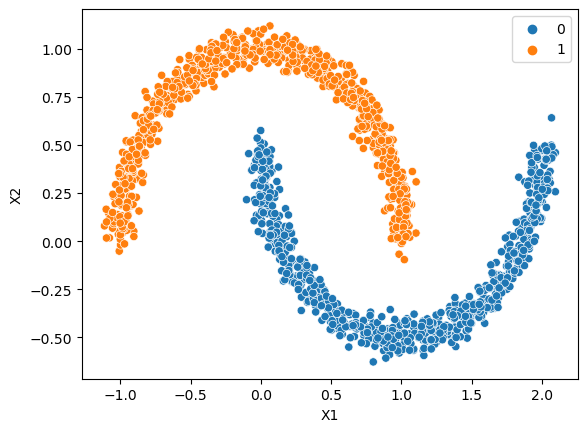

In [88]:
sns.scatterplot(data=df,x="X1",y="X2",hue=clstr,);

In [90]:
outlier=[]

for i in np.linspace(0.1,2,100):
    model=DBSCAN(eps=i)
    model.fit(scaled_df)
    
    outlier.append(np.sum(model.labels_ ==-1))

In [91]:
outlier

[9,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

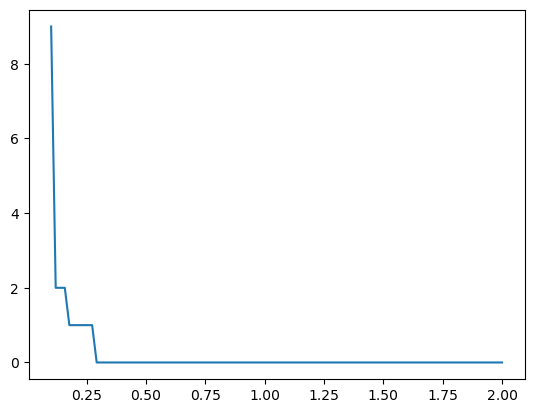

In [92]:
plt.plot(np.linspace(0.1,2,100),outlier)

In [93]:
outliers=[]
for i in np.arange(1,10):
    model=DBSCAN(min_samples=i)
    model.fit(scaled_df)
    
    outliers.append(np.sum(model.labels_==-1))

In [95]:
outliers

[]

In [96]:
df=pd.read_csv("cluster_two_blobs_outliers.csv")

In [97]:
df

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

<AxesSubplot:xlabel='X1', ylabel='X2'>

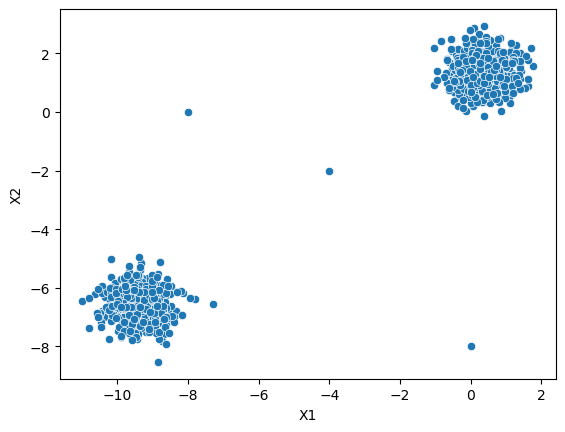

In [99]:
sns.scatterplot(data=df,x="X1",y="X2")

In [100]:
outliers=[]

for i in np.arange(1,10):
    model=DBSCAN(min_samples=i)
    model.fit(scaled_df)
    
    outliers.append(np.sum(model.labels_ ==-1))

In [101]:
outliers

[0, 3, 3, 3, 3, 3, 3, 3, 3]

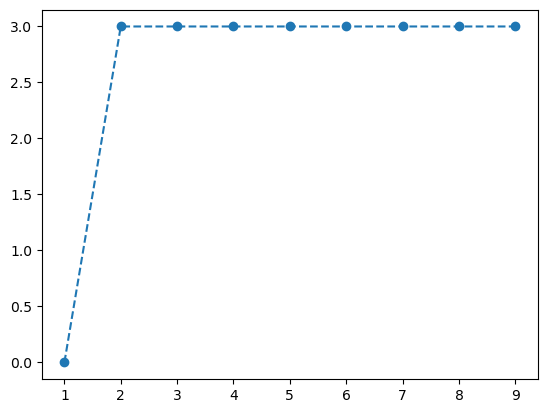

In [103]:
plt.plot(np.arange(1,10),outliers,"o--")